A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

In [241]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s)
advance_payments: Amount paid by the customer in advance by cash (in 100s)
probability_of_full_payment: Probability of payment done in full by the customer to the bank
current_balance: Balance amount left in the account to make purchases (in 1000s)
credit_limit: Limit of the amount in credit card (10000s)
min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [242]:
df=pd.read_csv(r"C:\Users\Mathesh R\Downloads\bank_marketing_part1_Data-1.csv")

In [243]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [169]:
#Five point summary
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


Data Preprocessing

In [80]:
#Find Duplicates
df.duplicated().sum()

0

In [82]:
#Find anamolies and bad data
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

EDA

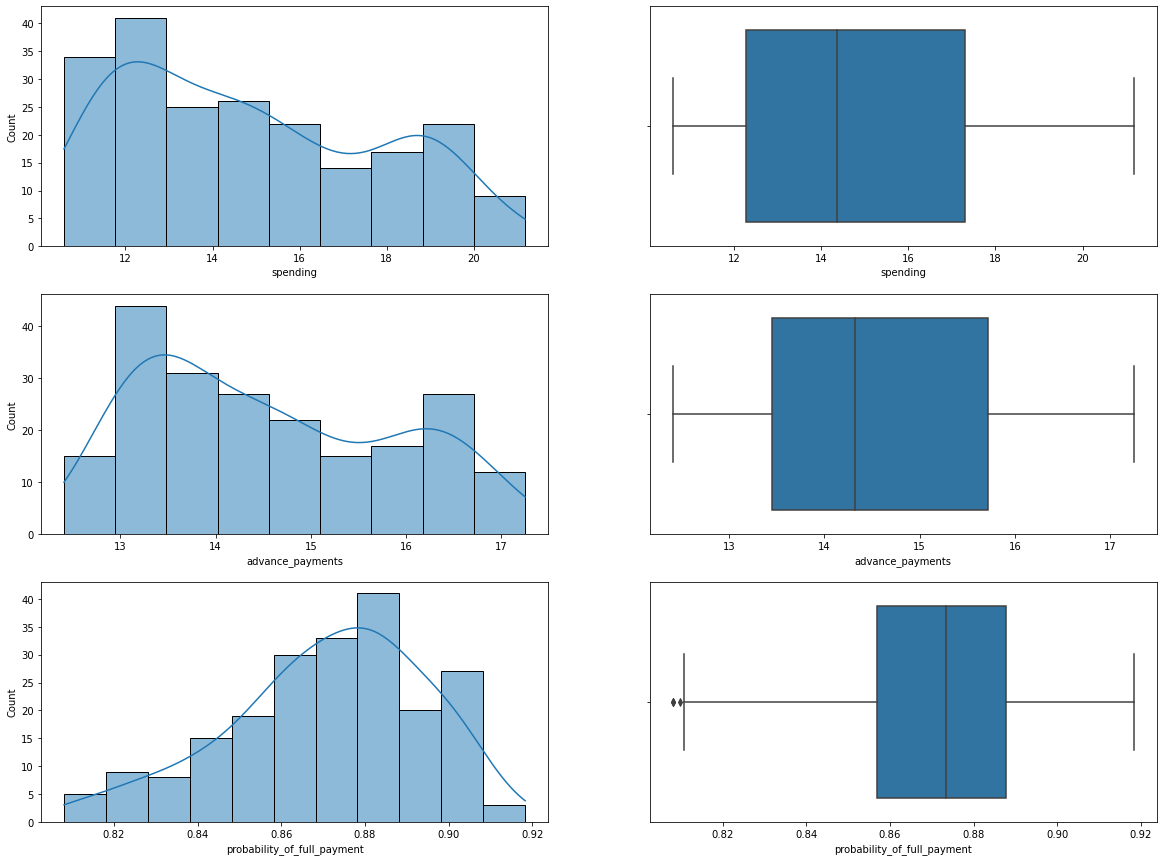

In [83]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20,15)
sns.histplot(df['spending'], kde=True, ax=axes[0][0])
sns.boxplot(x='spending', data=df, ax=axes[0][1])
sns.histplot(df['advance_payments'] , kde=True, ax=axes[1][0])
sns.boxplot(x='advance_payments', data=df , ax=axes[1][1])
sns.histplot(df['probability_of_full_payment'], kde=True, ax=axes[2][0])
sns.boxplot(x='probability_of_full_payment', data=df, ax=axes[2][1])
plt.show()

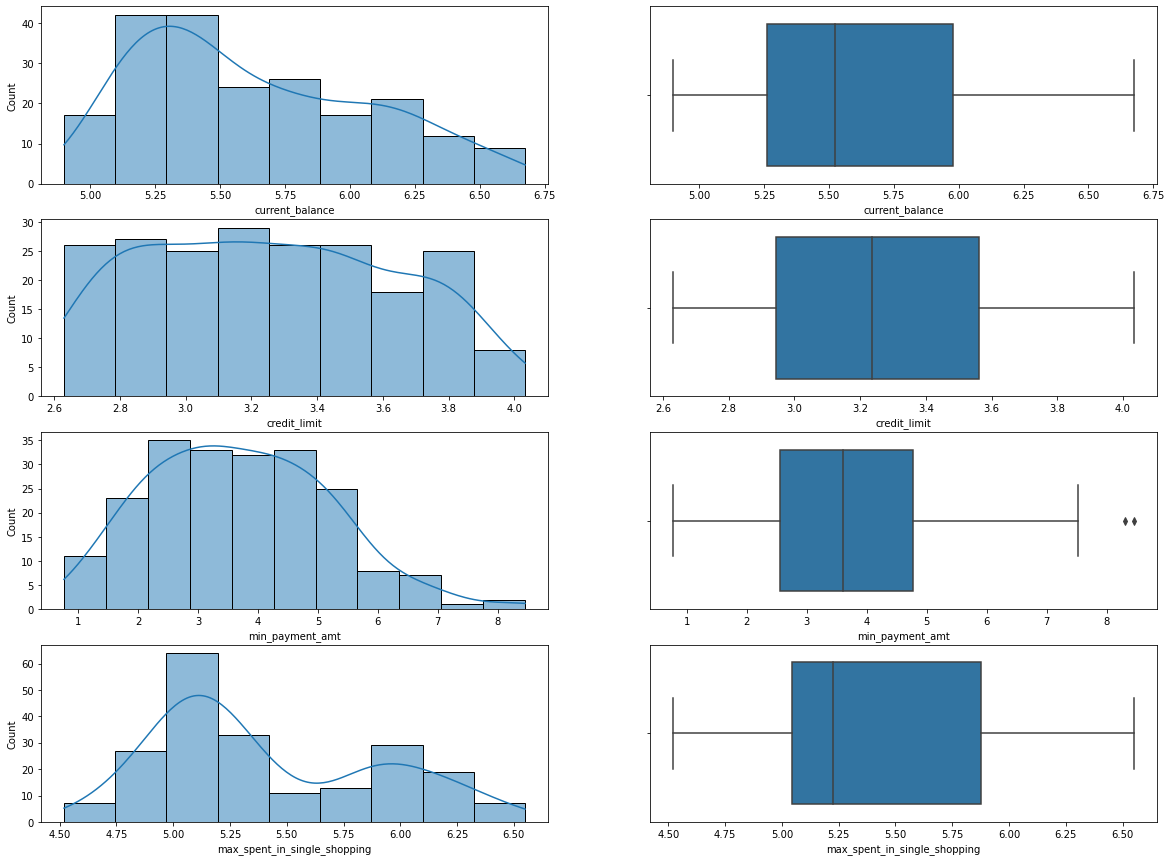

In [84]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,15)
sns.histplot(df['current_balance'] , kde=True, ax=axes[0][0])
sns.boxplot(x='current_balance', data=df , ax=axes[0][1])
sns.histplot(df['credit_limit'] , kde=True, ax=axes[1][0])
sns.boxplot(x='credit_limit', data=df , ax=axes[1][1])
sns.histplot(df['min_payment_amt'] , kde=True, ax=axes[2][0])
sns.boxplot(x='min_payment_amt', data=df , ax=axes[2][1])
sns.histplot(df['max_spent_in_single_shopping'] , kde=True, ax=axes[3][0])
sns.boxplot(x='max_spent_in_single_shopping', data=df , ax=axes[3][1])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

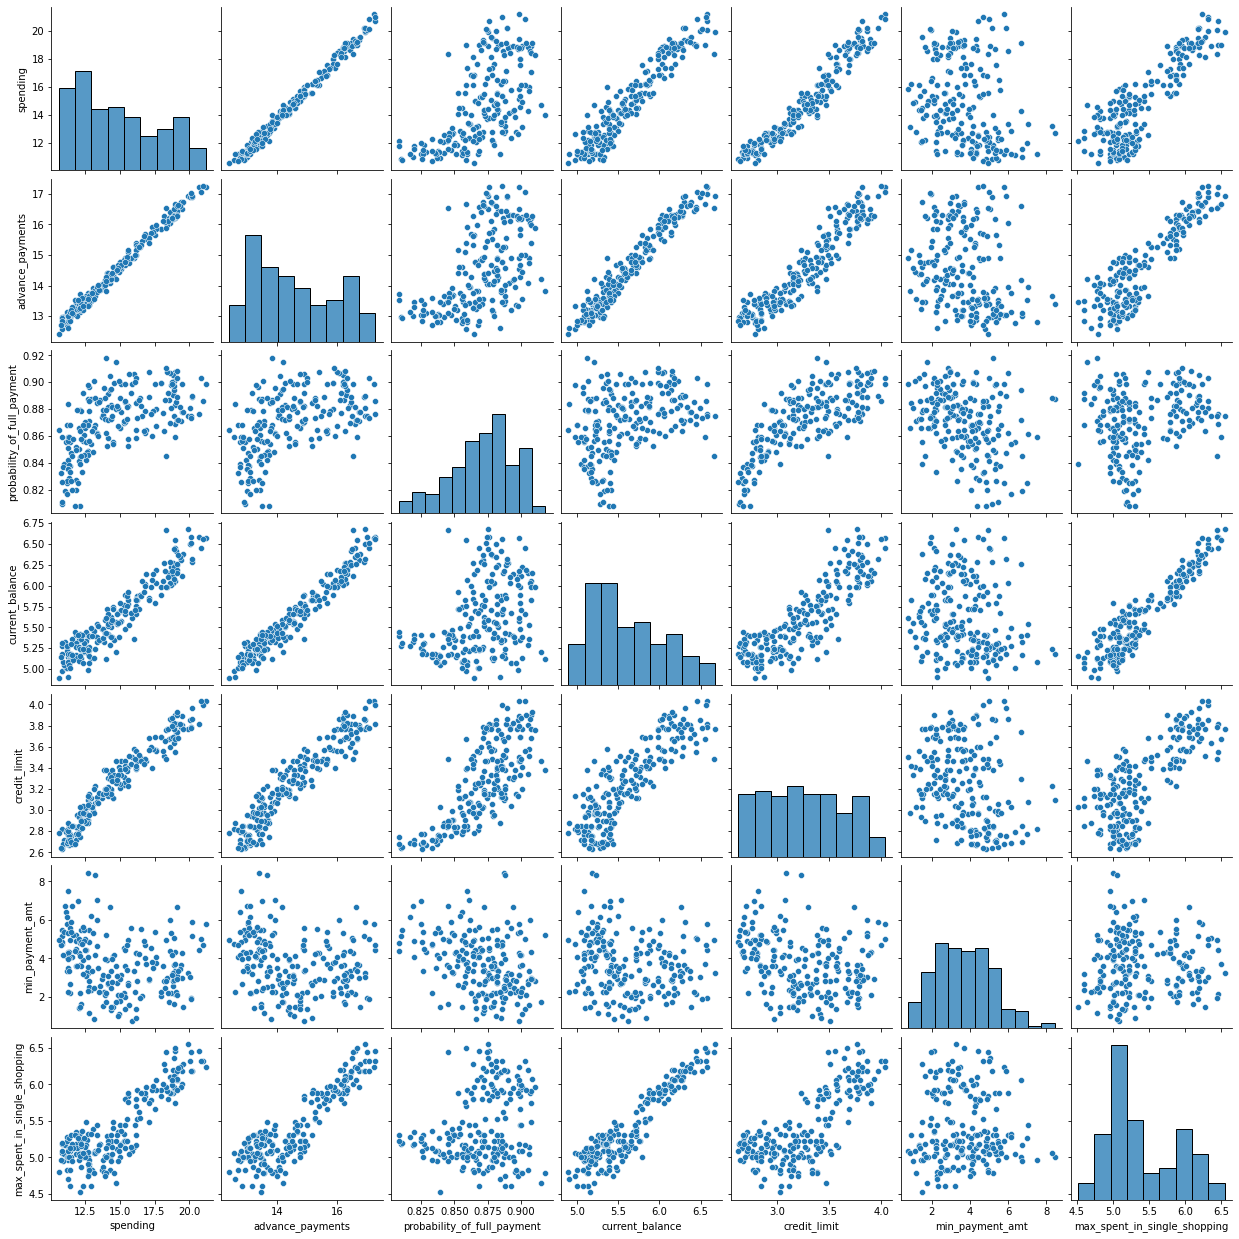

In [85]:
sns.pairplot(df)
plt.savefig('nn.png')
plt.show

In [86]:
corr = df.corr(method='pearson')

C:\Users\Mathesh R\AppData\Local\Temp\ipykernel_5364\3421424599.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


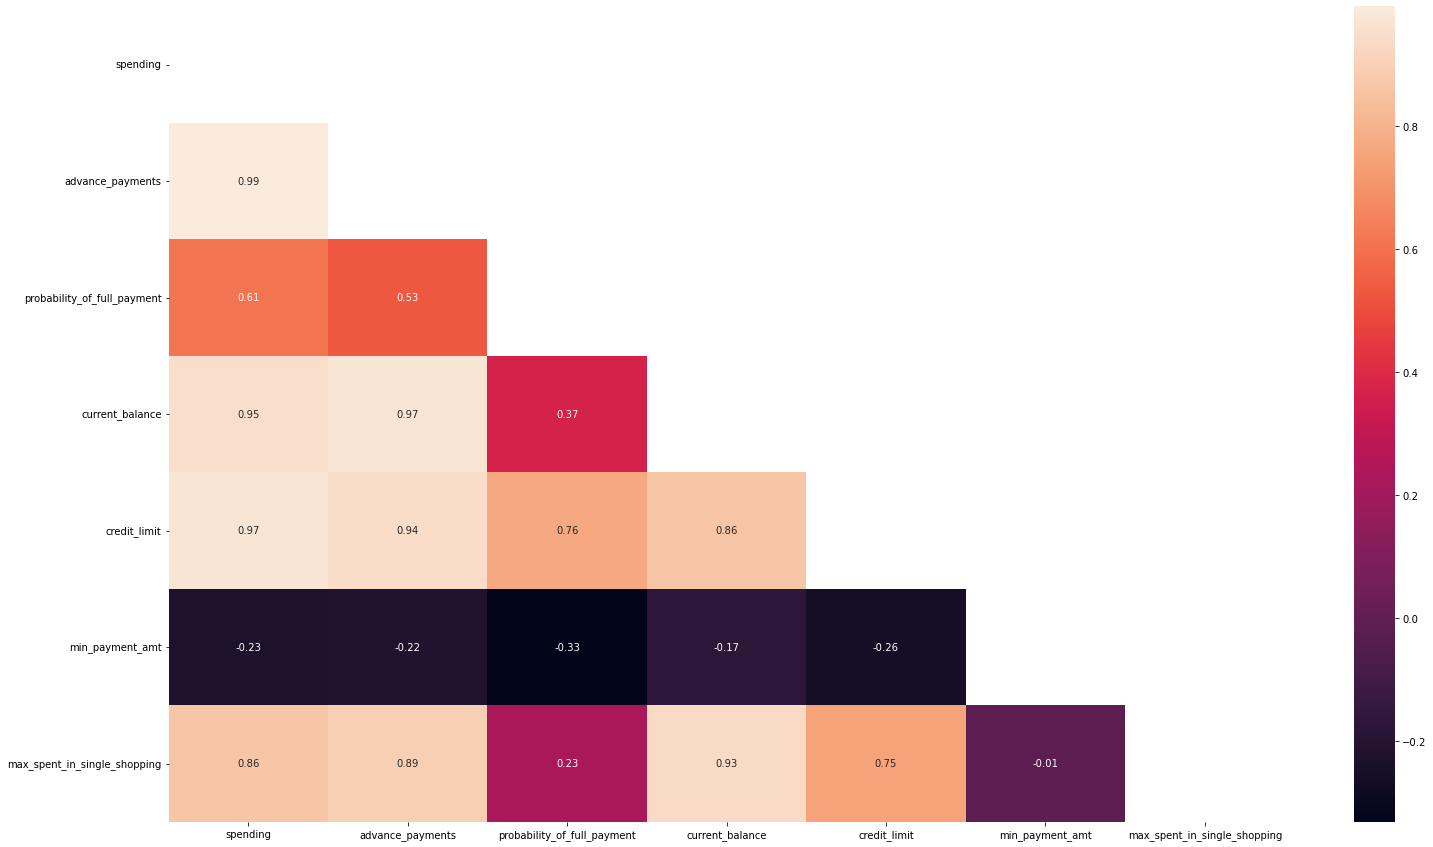

In [87]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

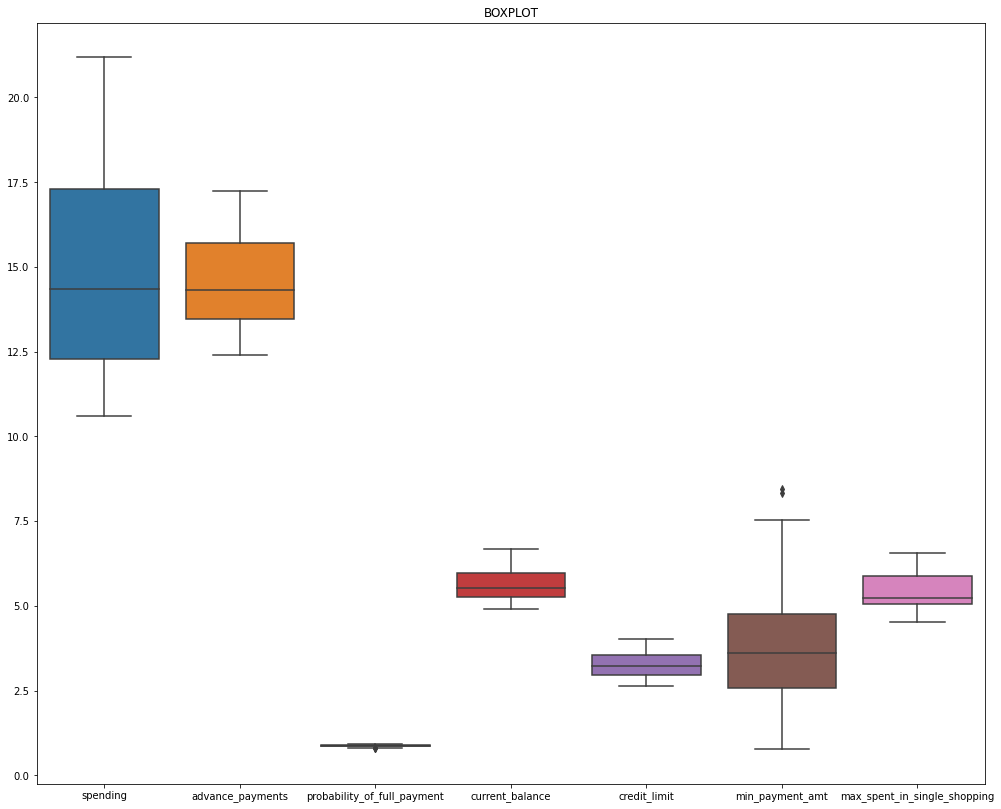

In [88]:
#find outliers
plt.figure(figsize=(17,14))
plt.title('BOXPLOT')
sns.boxplot(data=df)
plt.show()

<AxesSubplot:xlabel='probability_of_full_payment'>

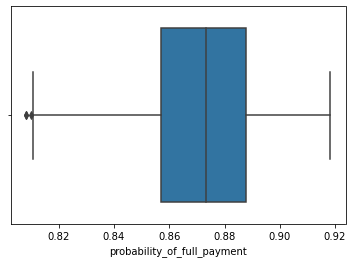

In [89]:
sns.boxplot(data=df,x='probability_of_full_payment')

From the box plot, it is clear that the variables ‘probability_of_full_payment’ and ‘min_payment_amt ‘ has few outliers. 
The presence of outliers in min_payment_amt indicate that those customer were the very affluent customers and the presence of them may impact the overall prediction. So, the outliers need to be treated.
We also treat the probability variable.

In [244]:
#Treating outliers by box plot method
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [245]:
lr,ur=remove_outlier(df['min_payment_amt'])
print("lower range",lr, "and upper range", ur)

lower range -0.7493749999999992 and upper range 8.079625


In [246]:
df['min_payment_amt']=np.where(df['min_payment_amt']>ur,ur,df['min_payment_amt'])


<AxesSubplot:xlabel='min_payment_amt'>

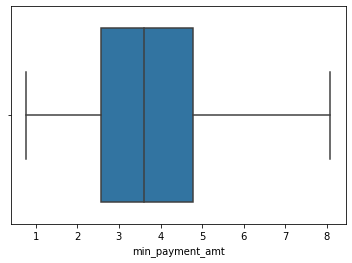

In [247]:
sns.boxplot(data=df,x='min_payment_amt')

In [248]:
def remove_outlier1(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [249]:
lrincome,urincome=remove_outlier1(df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>urincome,urincome,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lrincome,lrincome,df['probability_of_full_payment'])

<AxesSubplot:xlabel='probability_of_full_payment'>

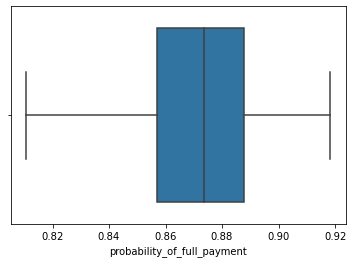

In [250]:
sns.boxplot(data=df,x='probability_of_full_payment')

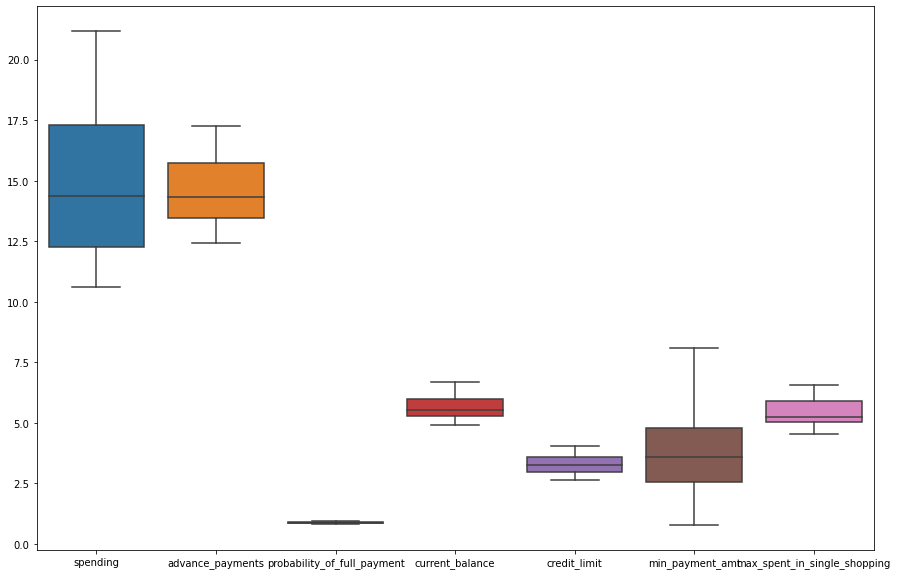

In [251]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

C:\Users\Mathesh R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='probability_of_full_payment'>

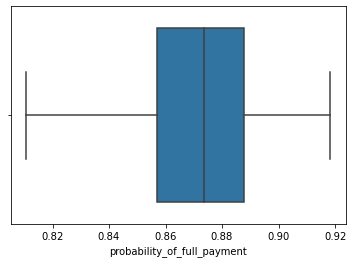

In [252]:
sns.boxplot(df['probability_of_full_payment'])

In [253]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [254]:
x= StandardScaler()

In [255]:
scaled_df = x.fit_transform(df)

In [182]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [256]:
scaled_dataframe = pd.DataFrame(scaled_df,columns = ['spending','advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt ','max_spent_in_single_shopping'])

In [135]:
#Dataframe before scaling
!pip install dataframe-image
import dataframe_image as dfi
kk=df.describe()
dfi.export(kk, 'dataframe1.png')
kk

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871025,5.628533,3.258605,3.697288,5.408071
std,2.909699,1.305959,0.023560,0.443063,0.377714,1.494689,0.491480
min,10.590000,12.410000,0.810588,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.079625,6.550000


In [257]:
scaled_dataframe.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.00000,210.00000,210.00000,210.00000,210.00000,210.00000,210.00000
mean,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000
std,1.00239,1.00239,1.00239,1.00239,1.00239,1.00239,1.00239
min,-1.46671,-1.64969,-2.57139,-1.65050,-1.66821,-1.96643,-1.81329
25%,-0.88796,-0.85143,-0.60097,-0.82868,-0.83491,-0.76170,-0.74050
50%,-0.16967,-0.18366,0.10317,-0.23763,-0.05734,-0.06592,-0.37746
75%,0.84660,0.88707,0.71265,0.79459,0.80450,0.71856,0.95639
max,2.18153,2.06526,2.01137,2.36753,2.05511,2.93894,2.32900


In [258]:
tt=scaled_dataframe.head()
dfi.export(tt, 'dataframe1.png')
tt

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


<AxesSubplot:>

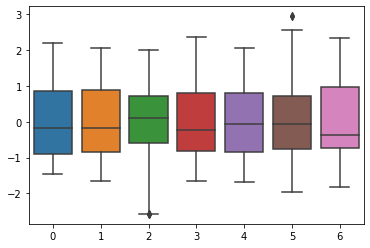

In [259]:
figsize=(15,20)
sns.boxplot(data=scaled_df)

In [261]:
#hierarchial clustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [262]:
#Divisive clustering
link = linkage(scaled_df, method = 'average')


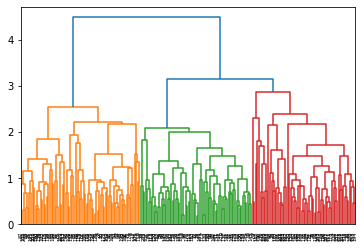

In [192]:
dend1= dendrogram(link)

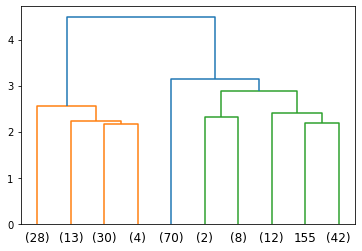

In [263]:
dend=dendrogram(link,
                 truncate_mode='lastp',
                 p = 10)# we are looking at the last 10 merges
                 #Last p=Plot p leafs at the bottom of the plot

In [264]:
from scipy.cluster.hierarchy import fcluster

In [265]:
# Method 1

clusters = fcluster(link, 2.9, criterion='distance')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [266]:
#Method 2
clusters1 = fcluster(link, 3, criterion='maxclust')
clusters1

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

Now, let us go ahead and check whether the number of clusters generated by the 'maxclust' criterion is same as the number of clusters generated by the 'distance' criterion is same.

In [267]:
np.array_equal(clusters1,clusters)

True

In [268]:
df['clusters'] = clusters

In [269]:
df.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [270]:
df.to_csv('hc.csv')

In [272]:
aggdata=df.groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569,65


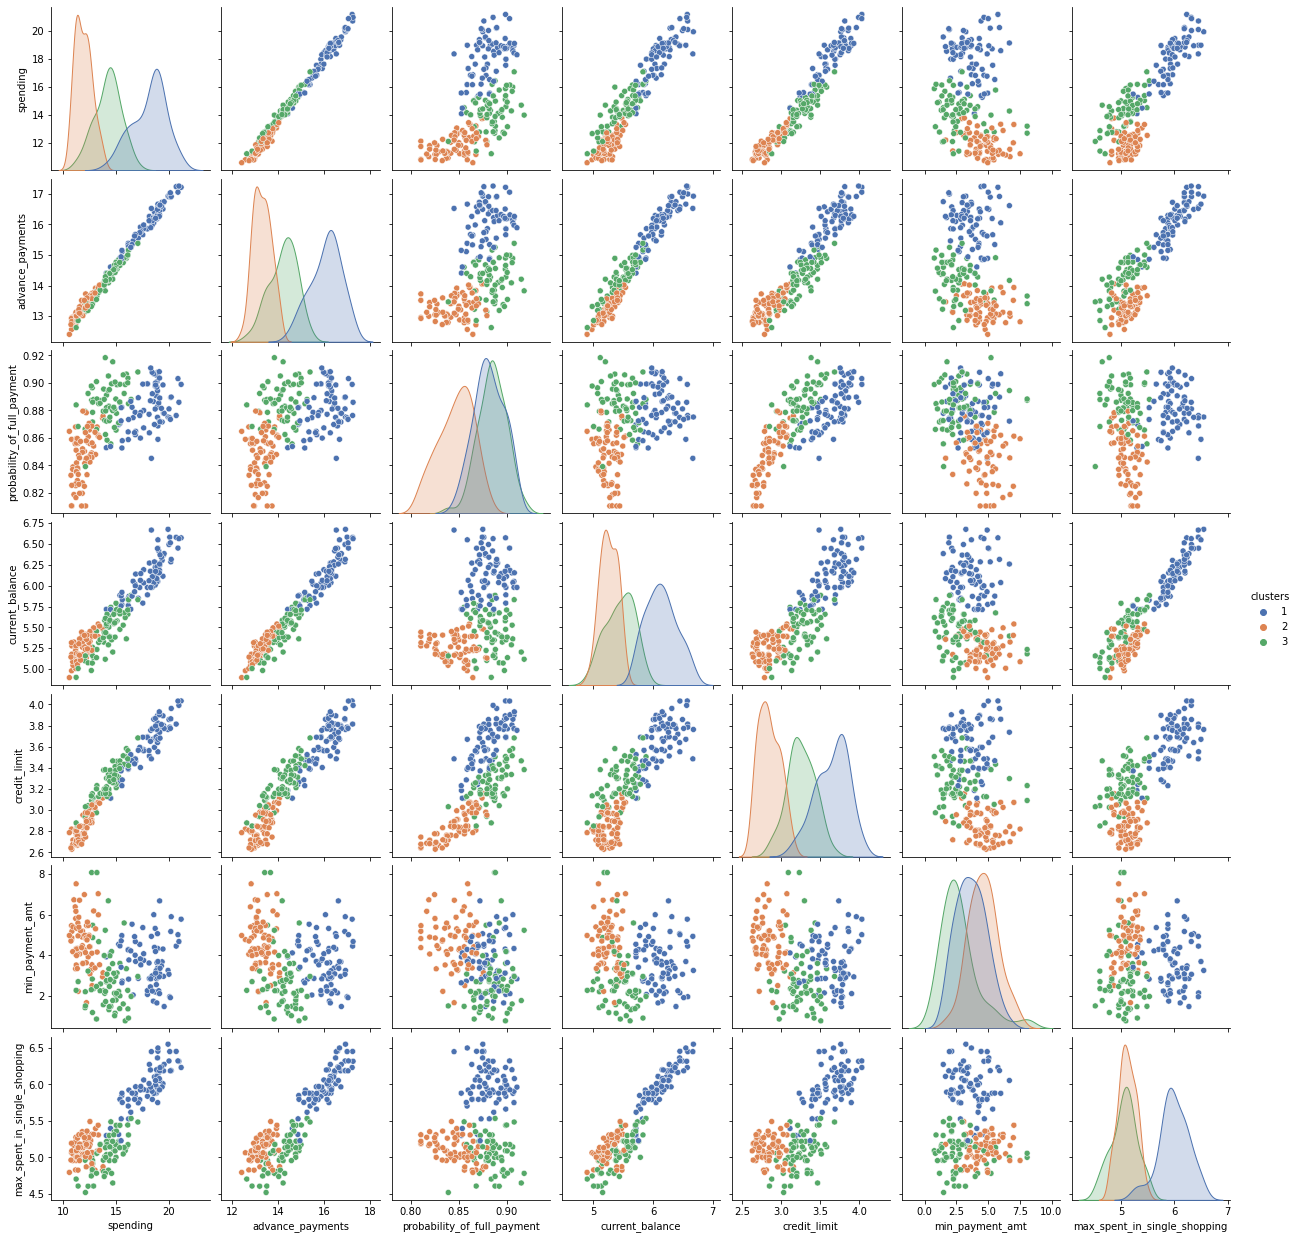

In [274]:

sns.pairplot(df,hue='clusters',palette='deep')
plt.savefig('foo.png')
plt.show()

<AxesSubplot:xlabel='spending', ylabel='advance_payments'>

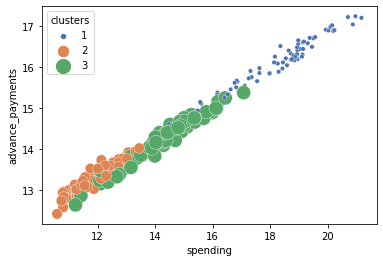

In [240]:
sns.scatterplot(
    data=df, x="spending", y="advance_payments", hue="clusters", size="clusters",
    sizes=(20, 200), hue_norm=(0, 7), legend="full",palette='deep'
)

In [ ]:
markers = {"Lunch": "s", "Dinner": "X"}
sns.scatterplot(data=tips, x="total_bill", y="tip", style="time", markers=markers)

In [71]:
#from sklearn.cluster import AgglomerativeClustering

In [72]:
#cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
#Cluster_agglo=cluster3.fit_predict(scaled_df)
#print(Cluster_agglo)

In [73]:
#df["Agglo_CLusters"]=Cluster_agglo

In [74]:
#agglo_data=df.groupby('Agglo_CLusters').mean()
#agglo_data['Freq']=df.Agglo_CLusters.value_counts()
#agglo_data

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(scaled_df['Milk'], data_scaled['Grocery'], c=cluster.labels_)

In [ ]:
1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [209]:
#k means clustering

In [275]:
from sklearn.cluster import KMeans

In [211]:
k_means = KMeans(n_clusters = 2,random_state=0)

In [212]:
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=0)

In [213]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [214]:
k_means.inertia_

659.1474009548499

In [276]:
wss =[] 

In [277]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

C:\Users\Mathesh R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [278]:
wss

[1469.9999999999998,
 659.1474009548499,
 430.29848175122294,
 371.24531081598496,
 327.095802651633,
 289.5833901404034,
 262.886624859573,
 242.16815822510648,
 221.72411941911253,
 209.71454541323862]

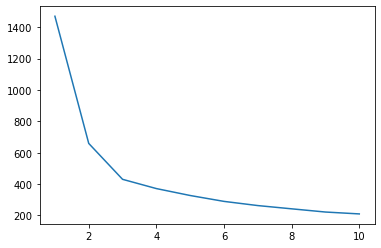

In [279]:
plt.plot(range(1,11), wss)

In [280]:
k_means = KMeans(n_clusters =3,random_state=0)
k_means.fit(scaled_df)
labels = k_means.labels_

In [281]:
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,2
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,2
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,2


In [282]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [283]:
silhouette_score(scaled_df,labels,random_state=0)

0.4008059221522216

In [284]:
sil_width = silhouette_samples(scaled_df,labels)

In [285]:
sil_width

array([0.5732776 , 0.36556355, 0.63709249, 0.515595  , 0.36097201,
       0.22152508, 0.47529542, 0.36025848, 0.51938329, 0.53443903,
       0.46599399, 0.12839864, 0.39177784, 0.52379458, 0.11202082,
       0.22512083, 0.33760956, 0.5018087 , 0.03635503, 0.23801566,
       0.36177434, 0.3693663 , 0.43153403, 0.26364196, 0.47484293,
       0.06663956, 0.27151643, 0.50414367, 0.55487254, 0.43479958,
       0.37528473, 0.43006502, 0.39151526, 0.3943622 , 0.5362567 ,
       0.55717776, 0.50878421, 0.42617776, 0.50641159, 0.62170114,
       0.55929539, 0.48579454, 0.39864428, 0.61044051, 0.51398993,
       0.37791063, 0.30664315, 0.58154614, 0.48759463, 0.53302467,
       0.31693425, 0.49463828, 0.58531649, 0.59861082, 0.61892471,
       0.23370264, 0.44475373, 0.54060572, 0.57808265, 0.57623567,
       0.55297302, 0.51585343, 0.55579575, 0.27793624, 0.49524145,
       0.56405298, 0.57784591, 0.52274801, 0.6313322 , 0.08521853,
       0.44260057, 0.3237709 , 0.54096805, 0.5820664 , 0.29582

In [225]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,2,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,0,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,2,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,2,0.360972


Cluster Profiling

In [226]:
df.Clus_kmeans.value_counts()

1    72
0    71
2    67
Name: Clus_kmeans, dtype: int64

In [286]:
clust_profile=df.drop(['clusters'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=df.Clus_kmeans.value_counts()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67


In [228]:
silhouette_samples(scaled_df,labels).min()

0.0027685411286160638

All are positive, so no observation is incorrectly mapped to the cluster.

C:\Users\Mathesh R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clus_kmeans', ylabel='advance_payments'>

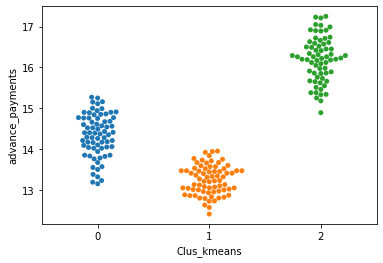

In [229]:
sns.swarmplot(df.Clus_kmeans,df.advance_payments)

<AxesSubplot:xlabel='spending', ylabel='advance_payments'>

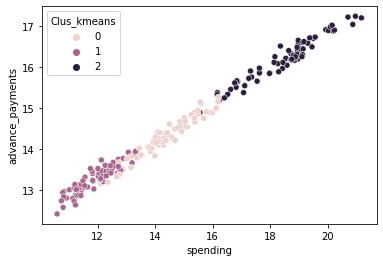

In [230]:
sns.scatterplot(x='spending',y='advance_payments',hue='Clus_kmeans',data=df,
               legend="full")

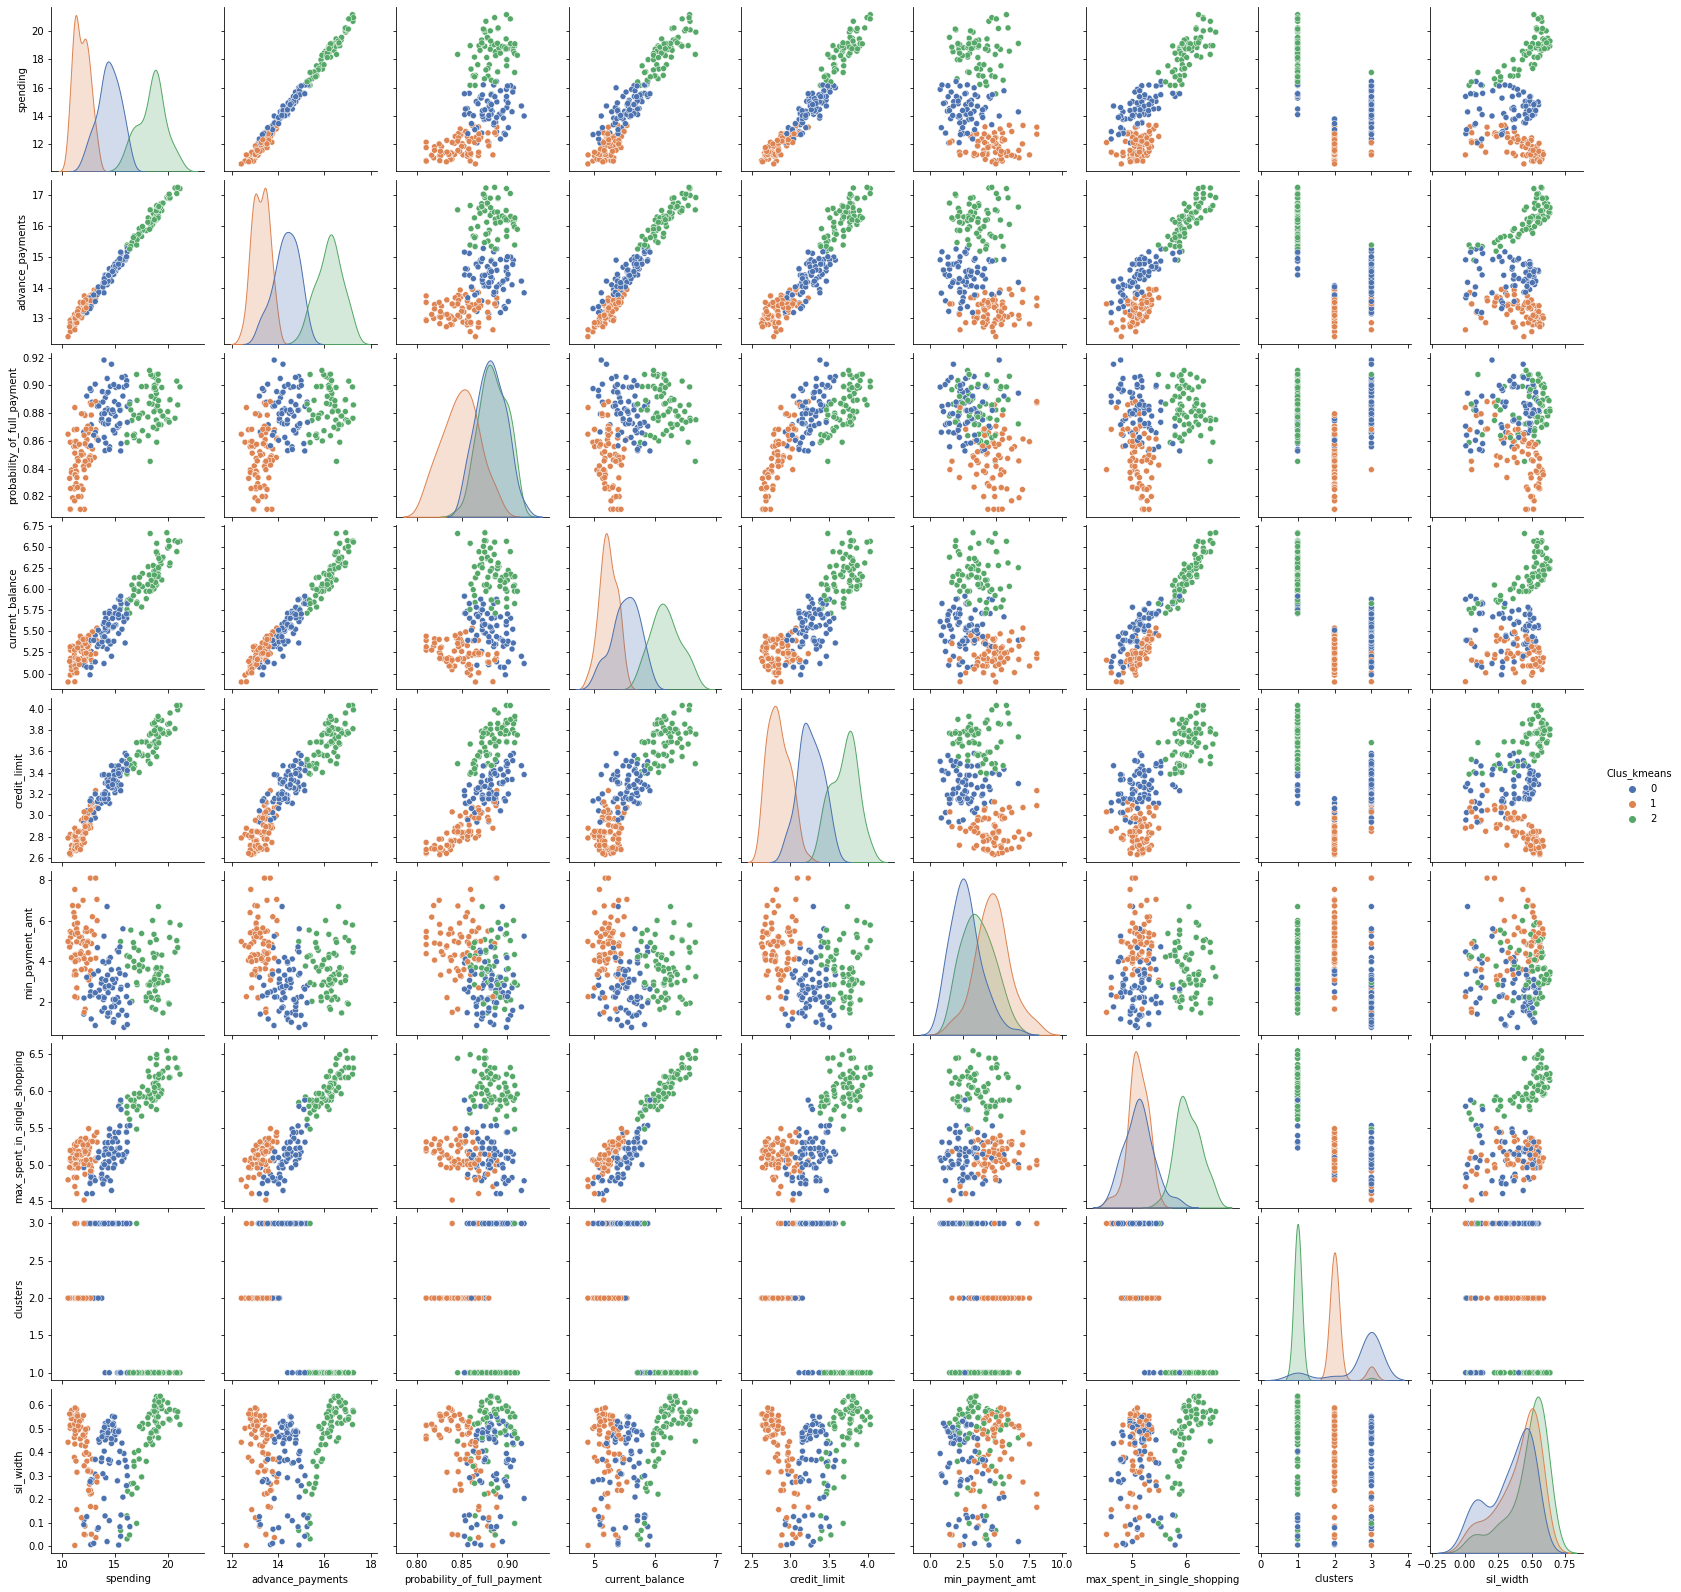

In [233]:
sns.pairplot(data=df,hue='Clus_kmeans',palette='deep')